15_neda_mimfpt_(ML_RFC)

Engin Abdan

### Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier 

from yellowbrick.classifier import ClassPredictionError

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#plt.style.use('classic')
sns.set_style("white")

### Data

In [2]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [3]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [4]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [5]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [6]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [7]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [8]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [9]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

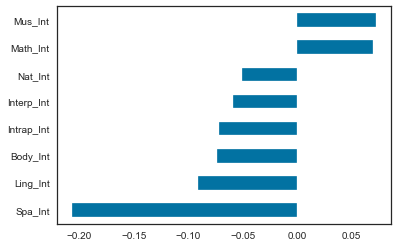

In [10]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### RFC & Model

In [12]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 3 13]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.43      0.19      0.26        16
           1       0.43      0.71      0.54        14

    accuracy                           0.43        30
   macro avg       0.43      0.45      0.40        30
weighted avg       0.43      0.43      0.39        30



### RFC & CV

In [13]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ["precision_macro",
                                   "recall_macro",
                                   "f1_macro",
                                   "accuracy"],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
df_scores.mean()[2:]

    fit_time  score_time  test_precision_macro  test_recall_macro  \
1   0.181596    0.020372              0.333333           0.400000   
2   0.182777    0.019825              0.357143           0.500000   
3   0.180139    0.020076              0.916667           0.750000   
4   0.156652    0.015628              0.300000           0.300000   
5   0.150185    0.015552              0.285714           0.500000   
6   0.160384    0.016423              0.416667           0.416667   
7   0.189626    0.025001              0.900000           0.833333   
8   0.246694    0.029991              0.416667           0.416667   
9   0.278605    0.029004              0.833333           0.666667   
10  0.188519    0.020699              0.285714           0.500000   

    test_f1_macro  test_accuracy  
1        0.363636       0.571429  
2        0.416667       0.714286  
3        0.787879       0.857143  
4        0.300000       0.428571  
5        0.363636       0.571429  
6        0.416667       0.4285

test_precision_macro    0.504524
test_recall_macro       0.528333
test_f1_macro           0.492323
test_accuracy           0.614286
dtype: float64

### Best Number of "n_estimators"

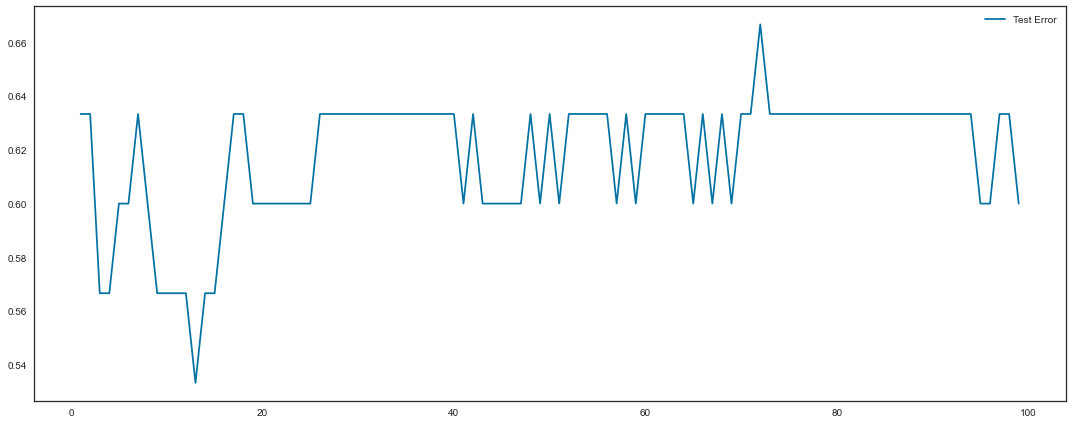

In [14]:
from sklearn.metrics import accuracy_score

test_error = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_features='auto', random_state=42)
    model.fit(x_train, y_train)
    test_preds = model.predict(x_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

### RFC & GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}

In [17]:
model = RandomForestClassifier(random_state=42)

grid_model = GridSearchCV(model,
                          param_grid,
                          scoring = "accuracy",
                          n_jobs = -1,
                          verbose = 2)

In [18]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy', verbose=2)

In [19]:
grid_model.best_params_

{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}

In [20]:
y_test_pred = grid_model.predict(x_test)
y_train_pred = grid_model.predict(x_train)

In [21]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[16 10]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.81      1.00      0.90        44

    accuracy                           0.86        70
   macro avg       0.91      0.81      0.83        70
weighted avg       0.88      0.86      0.85        70



In [22]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 2 14]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.42      0.71      0.53        14

    accuracy                           0.40        30
   macro avg       0.38      0.42      0.35        30
weighted avg       0.37      0.40      0.34        30



In [23]:
model = RandomForestClassifier(max_depth=4,
                               max_features=3,
                               min_samples_split=2,
                               n_estimators=15,
                               min_samples_leaf=2,
                               random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3, min_samples_leaf=2,
                       n_estimators=15, random_state=42)

In [24]:
y_train_pred = model.predict(x_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[18  8]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        26
           1       0.85      1.00      0.92        44

    accuracy                           0.89        70
   macro avg       0.92      0.85      0.87        70
weighted avg       0.90      0.89      0.88        70



In [25]:
y_test_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 2 14]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.44      0.79      0.56        14

    accuracy                           0.43        30
   macro avg       0.42      0.46      0.38        30
weighted avg       0.42      0.43      0.36        30



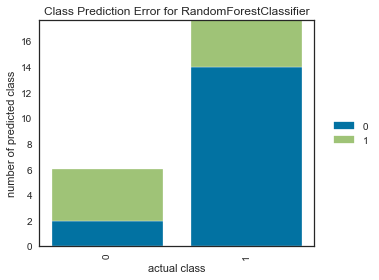

In [26]:
from yellowbrick.classifier import ClassPredictionError
model = RandomForestClassifier(random_state=42)
visualizer = ClassPredictionError(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Feature Importances

In [27]:
model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(x_train, y_train)

Feat_Imp = pd.DataFrame(index=x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Intrap_Int,0.086210
Interp_Int,0.097374
Spa_Int,0.121257
Ling_Int,0.123701
Body_Int,0.126522
Mus_Int,0.133025
Math_Int,0.152101
Nat_Int,0.159810


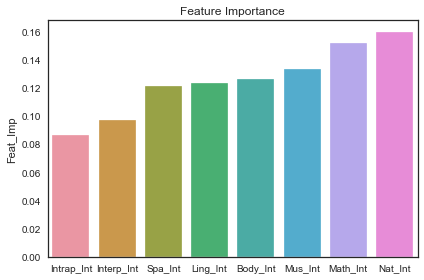

In [28]:
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

### Visualize Tree

In [29]:
model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [30]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

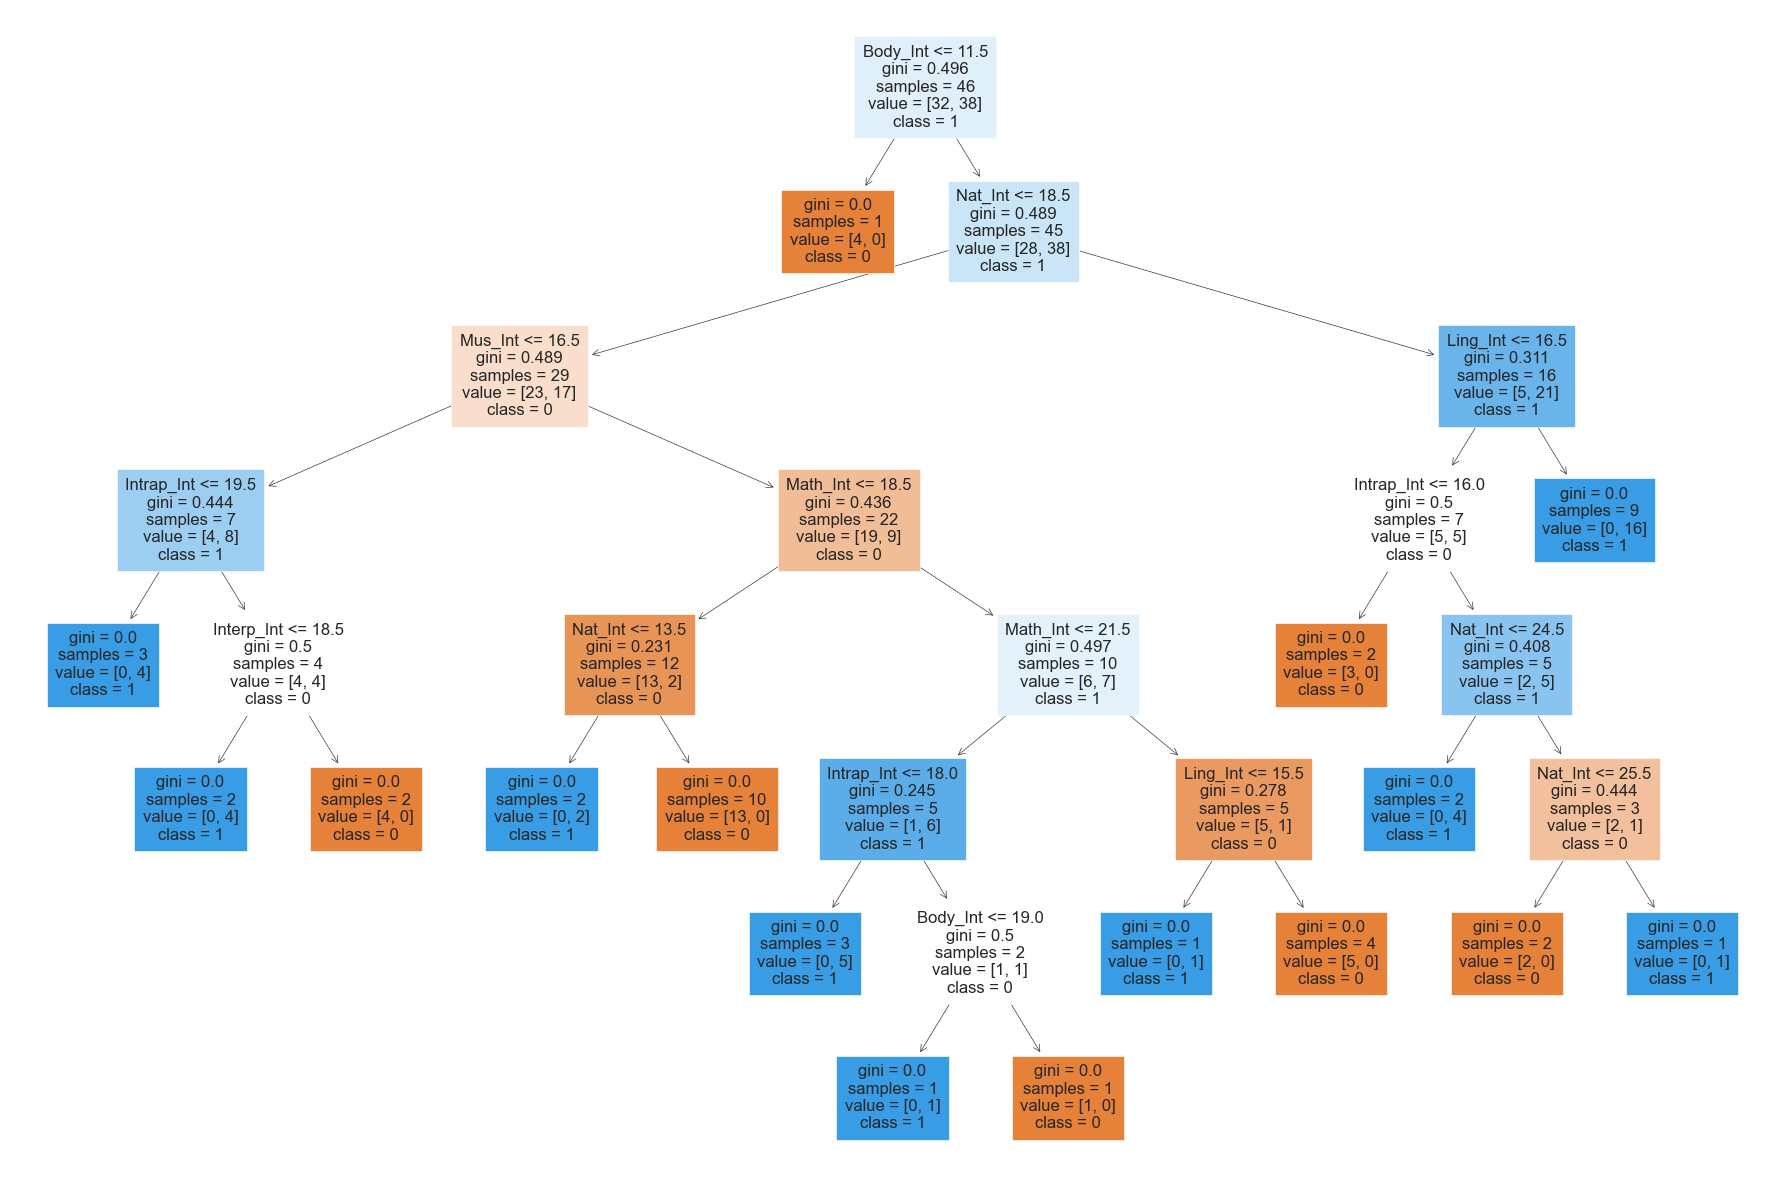

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12,8), dpi = 150)

plot_tree(model.estimators_[0],
          filled = True,
          feature_names = x.columns,
          class_names = ["0", "1"],
          fontsize = 8)
plt.tight_layout();

### Best Threshold

In [32]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [33]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [34]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [35]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred1"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba
83,22,19,13,18,21,18,15,19,1,1,0.866667
53,17,13,18,13,13,22,23,20,1,0,0.333333
70,21,16,16,16,19,18,18,20,1,1,0.666667
45,14,14,15,26,20,13,20,14,1,1,0.600000
44,16,17,16,17,21,19,18,20,0,1,0.800000


In [36]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 3 13]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.43      0.19      0.26        16
           1       0.43      0.71      0.54        14

    accuracy                           0.43        30
   macro avg       0.43      0.45      0.40        30
weighted avg       0.43      0.43      0.39        30



In [37]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.6666666666666666

In [38]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2
83,22,19,13,18,21,18,15,19,1,1,0.866667,1
53,17,13,18,13,13,22,23,20,1,0,0.333333,0
70,21,16,16,16,19,18,18,20,1,1,0.666667,1
45,14,14,15,26,20,13,20,14,1,1,0.600000,0
44,16,17,16,17,21,19,18,20,0,1,0.800000,1


In [39]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 5 11]
 [ 8  6]]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34        16
           1       0.35      0.43      0.39        14

    accuracy                           0.37        30
   macro avg       0.37      0.37      0.37        30
weighted avg       0.37      0.37      0.36        30



In [40]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.6666666666666666

In [41]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2,pred3
83,22,19,13,18,21,18,15,19,1,1,0.866667,1,1
53,17,13,18,13,13,22,23,20,1,0,0.333333,0,0
70,21,16,16,16,19,18,18,20,1,1,0.666667,1,1
45,14,14,15,26,20,13,20,14,1,1,0.600000,0,0
44,16,17,16,17,21,19,18,20,0,1,0.800000,1,1


In [42]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 5 11]
 [ 8  6]]
              precision    recall  f1-score   support

           0       0.38      0.31      0.34        16
           1       0.35      0.43      0.39        14

    accuracy                           0.37        30
   macro avg       0.37      0.37      0.37        30
weighted avg       0.37      0.37      0.36        30



### Prediction

In [43]:
model = RandomForestClassifier(n_estimators=15, random_state=42)
model.fit(x, y)

RandomForestClassifier(n_estimators=15, random_state=42)

In [44]:
columns_name = x.columns

In [45]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [46]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.6666666666666666

optimal_threshold_prc: 0.6666666666666666


In [47]:
predictions1 = model.predict(pred_data)[0]
predictions1

0

In [48]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0.73333333 0.26666667]
0.7333333333333333
0.26666666666666666


In [49]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

0

In [50]:
pred_data["pred1"] = predictions1
pred_data["pred_proba"] = predictions_proba[0][0]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba,pred2
0,35,36,34,37,15,17,19,21,0,0.733333,0


In [51]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_rac

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.6666666666666666
Predictions_Proba	: 0.26666666666666666
Prediction		: 0
Result			: Not Pilot
